# Classification of Pulsars

This notebook contains code for an algorithm that classifiies pulsars given certain data. The data was obtained from...

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import scipy.stats
from sklearn.model_selection import train_test_split
from mpl_toolkits.mplot3d import Axes3D
%matplotlib inline


In [2]:
stars = pd.read_csv('pulsar_stars.csv')
stars.head()

,Mean of the integrated profile,Standard deviation of the integrated profile,Excess kurtosis of the integrated profile,Skewness of the integrated profile,Mean of the DM-SNR curve,Standard deviation of the DM-SNR curve,Excess kurtosis of the DM-SNR curve,Skewness of the DM-SNR curve,target_class
0,140.562500,55.683782,-0.234571,-0.699648,3.199833,19.110426,7.975532,74.242225,0
1,102.507812,58.882430,0.465318,-0.515088,1.677258,14.860146,10.576487,127.393580,0
2,103.015625,39.341649,0.323328,1.051164,3.121237,21.744669,7.735822,63.171909,0
3,136.750000,57.178449,-0.068415,-0.636238,3.642977,20.959280,6.896499,53.593661,0
4,88.726562,40.672225,0.600866,1.123492,1.178930,11.468720,14.269573,252.567306,0


In [3]:
stars.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17898 entries, 0 to 17897
Data columns (total 9 columns):
 #   Column                                         Non-Null Count  Dtype  
---  ------                                         --------------  -----  
 0    Mean of the integrated profile                17898 non-null  float64
 1    Standard deviation of the integrated profile  17898 non-null  float64
 2    Excess kurtosis of the integrated profile     17898 non-null  float64
 3    Skewness of the integrated profile            17898 non-null  float64
 4    Mean of the DM-SNR curve                      17898 non-null  float64
 5    Standard deviation of the DM-SNR curve        17898 non-null  float64
 6    Excess kurtosis of the DM-SNR curve           17898 non-null  float64
 7    Skewness of the DM-SNR curve                  17898 non-null  float64
 8   target_class                                   17898 non-null  int64  
dtypes: float64(8), int64(1)
memory usage: 1.2 MB


In [4]:
stars.describe()

,Mean of the integrated profile,Standard deviation of the integrated profile,Excess kurtosis of the integrated profile,Skewness of the integrated profile,Mean of the DM-SNR curve,Standard deviation of the DM-SNR curve,Excess kurtosis of the DM-SNR curve,Skewness of the DM-SNR curve,target_class
count,17898.000000,17898.000000,17898.000000,17898.000000,17898.000000,17898.000000,17898.000000,17898.000000,17898.000000
mean,111.079968,46.549532,0.477857,1.770279,12.614400,26.326515,8.303556,104.857709,0.091574
std,25.652935,6.843189,1.064040,6.167913,29.472897,19.470572,4.506092,106.514540,0.288432
min,5.812500,24.772042,-1.876011,-1.791886,0.213211,7.370432,-3.139270,-1.976976,0.000000
25%,100.929688,42.376018,0.027098,-0.188572,1.923077,14.437332,5.781506,34.960504,0.000000
50%,115.078125,46.947479,0.223240,0.198710,2.801839,18.461316,8.433515,83.064556,0.000000
75%,127.085938,51.023202,0.473325,0.927783,5.464256,28.428104,10.702959,139.309331,0.000000
max,192.617188,98.778911,8.069522,68.101622,223.392140,110.642211,34.539844,1191.000837,1.000000


In [5]:
#We can see how many pulsars there are in total, and what percentage of the stars catelogued this is:
total_pulsars = sum(stars.target_class)
total_stars = len(stars)
percentage = round(total_pulsars / total_stars * 100 , 2)
print('There are',total_pulsars,'pulsars, which is only',percentage,'% of the total',total_stars,'stars surveyed.')

There are 1639 pulsars, which is only 9.16 % of the total 17898 stars surveyed.


In [6]:
#The column names are cumbersome, so let's rename them for ease of use:
col = ['mean_IP','std_IP','kurt_IP','skew_IP','mean_c','std_c','kurt_c','skew_c','target_class']
stars.columns = col
stars.head()

,mean_IP,std_IP,kurt_IP,skew_IP,mean_c,std_c,kurt_c,skew_c,target_class
0,140.562500,55.683782,-0.234571,-0.699648,3.199833,19.110426,7.975532,74.242225,0
1,102.507812,58.882430,0.465318,-0.515088,1.677258,14.860146,10.576487,127.393580,0
2,103.015625,39.341649,0.323328,1.051164,3.121237,21.744669,7.735822,63.171909,0
3,136.750000,57.178449,-0.068415,-0.636238,3.642977,20.959280,6.896499,53.593661,0
4,88.726562,40.672225,0.600866,1.123492,1.178930,11.468720,14.269573,252.567306,0


With our data in a nice dataframe and no missing information, we can separate the sample into training and testing data sets.

In [7]:
#First we assign the proper columns as X and y:
X = stars.drop('target_class',axis=1)
y = stars.target_class

In [8]:
#Now we use train_test_split to split our data:
Xtr,Xtst,ytr,ytst = train_test_split(X,y,test_size = .2, random_state=np.random.randint(1,1000))

Before we train and test a model, let's explore the data to see what type of model might be best to use.

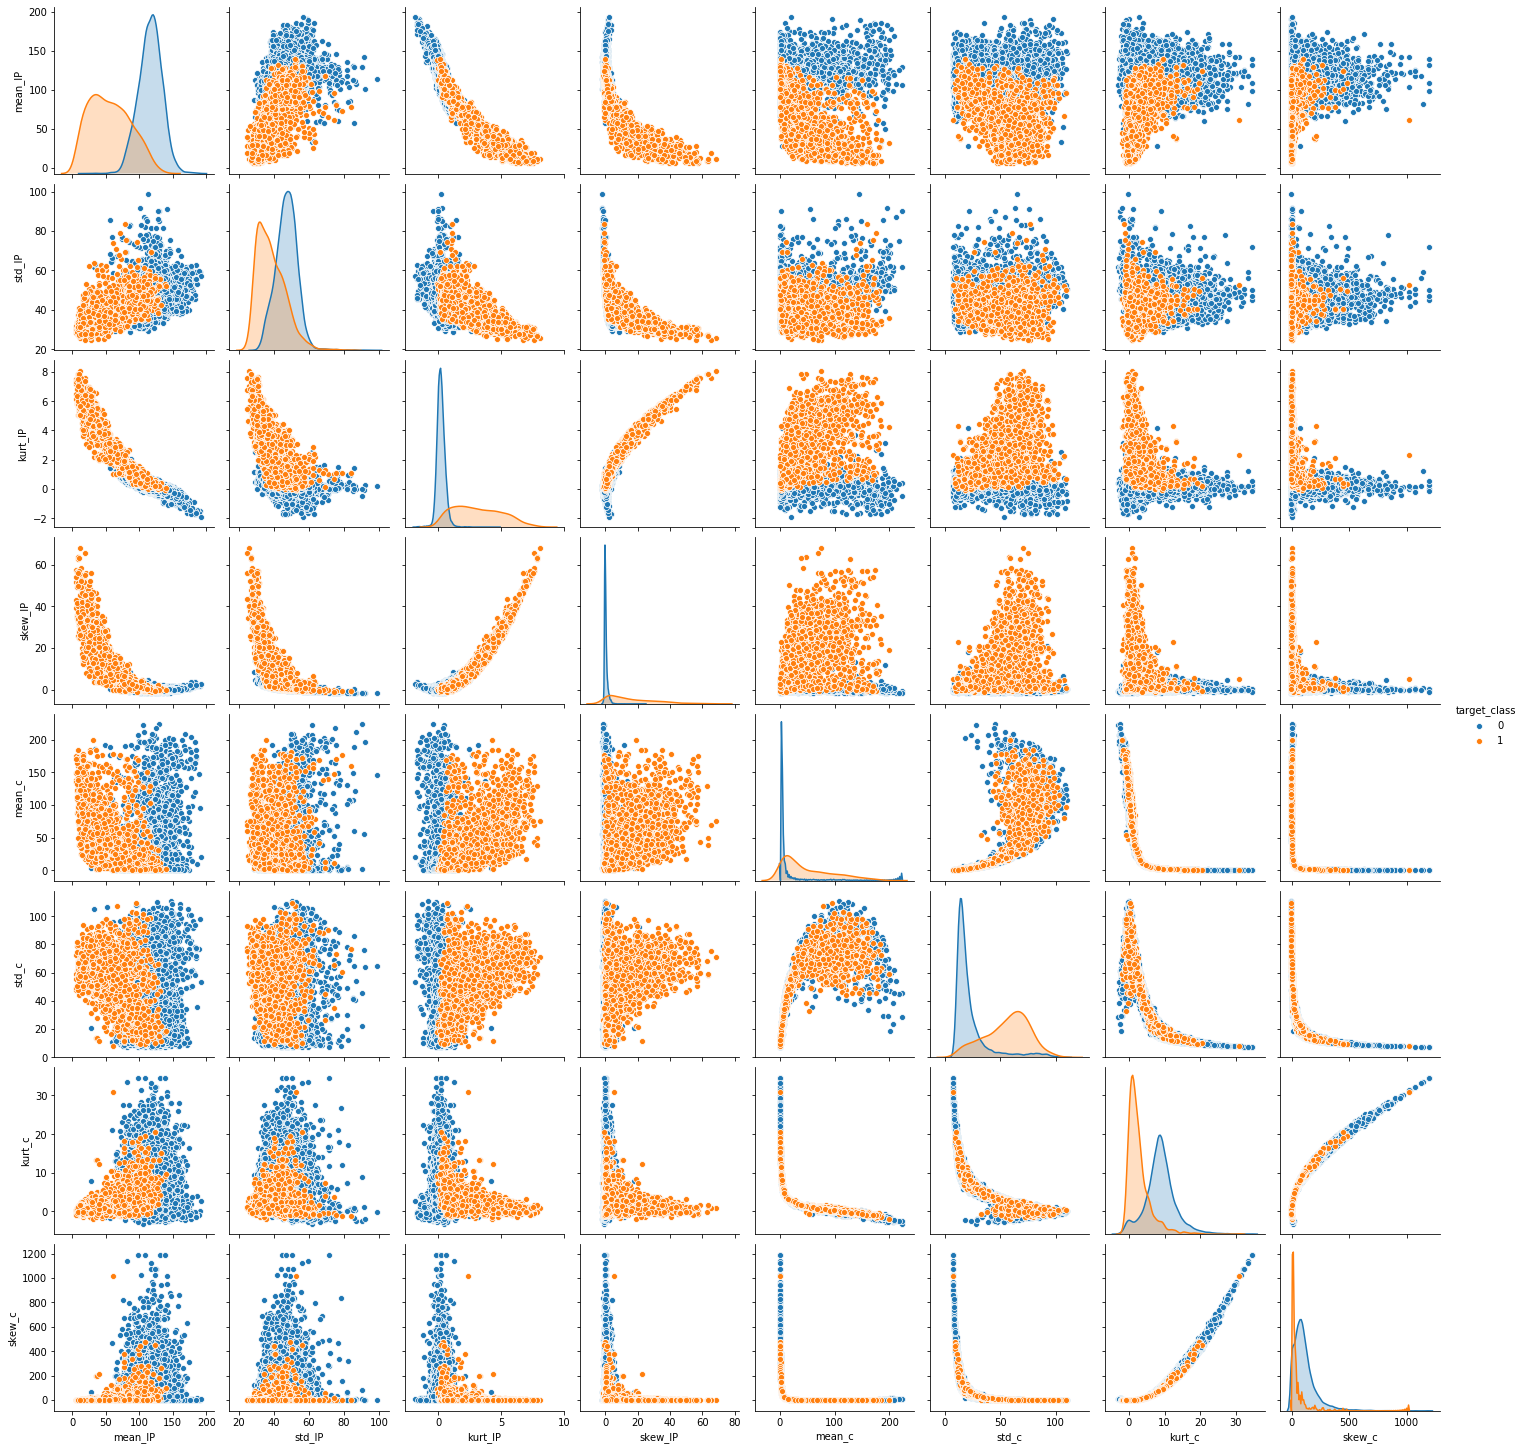

In [9]:
sns.pairplot(stars,hue='target_class')

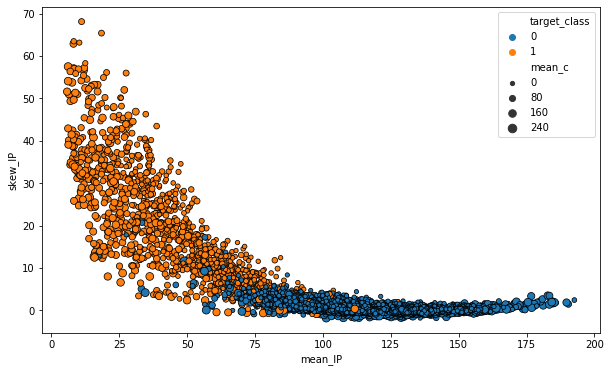

In [9]:
_=plt.figure(figsize=(10,6))
_=sns.scatterplot(x='mean_IP',y='skew_IP',data=stars,hue='target_class',edgecolor='black',size='mean_c')

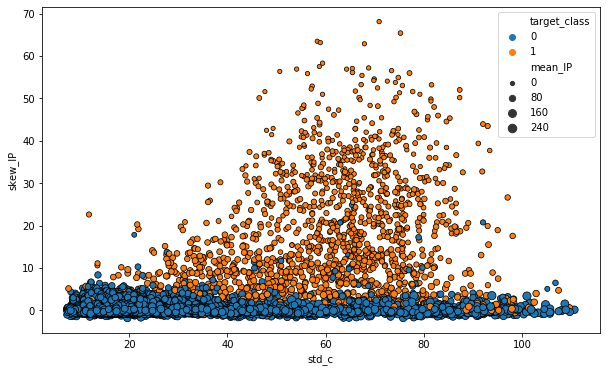

In [10]:
_=plt.figure(figsize=(10,6))
_=sns.scatterplot(x='std_c',y='skew_IP',data=stars,hue='target_class',edgecolor='black',size='mean_IP')

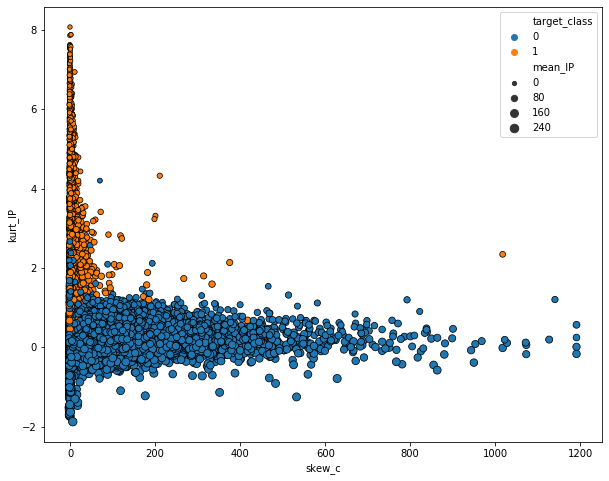

In [11]:
_=plt.figure(figsize=(10,8))
_=sns.scatterplot(x='skew_c',y='kurt_IP',data=stars,hue='target_class',edgecolor='black',size='mean_IP')

While there appears to be some excellent clustering, there also appears to be some pretty substantial overlap. There are a few examples that make it clear that kNN would give incorrect classifications on several of the stars. No apparent boundary layer exists for any of the comparisons, either. Perhaps more clearly separated clustering can be seen in a 3-D scatter plot.

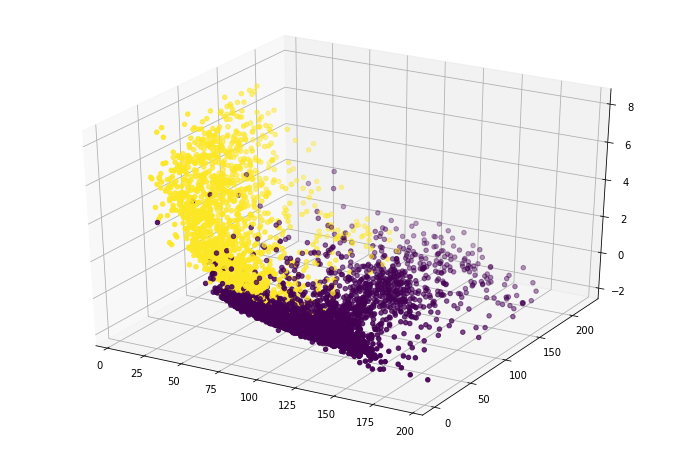

In [12]:
fig = plt.figure(figsize=(12,8))
ax = fig.add_subplot(111,projection='3d')
ax.scatter(stars.mean_IP,stars.mean_c,stars.kurt_IP,c=stars.target_class,marker='o')


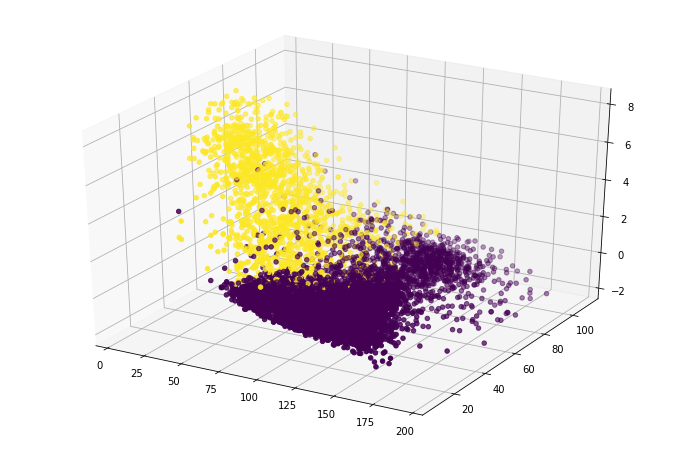

In [13]:
fig = plt.figure(figsize=(12,8))
ax = fig.add_subplot(111,projection='3d')
ax.scatter(stars.mean_IP,stars.std_c,stars.kurt_IP,c=stars.target_class,marker='o')

In [14]:
stars.columns

Index(['mean_IP', 'std_IP', 'kurt_IP', 'skew_IP', 'mean_c', 'std_c', 'kurt_c',
       'skew_c', 'target_class'],
      dtype='object')

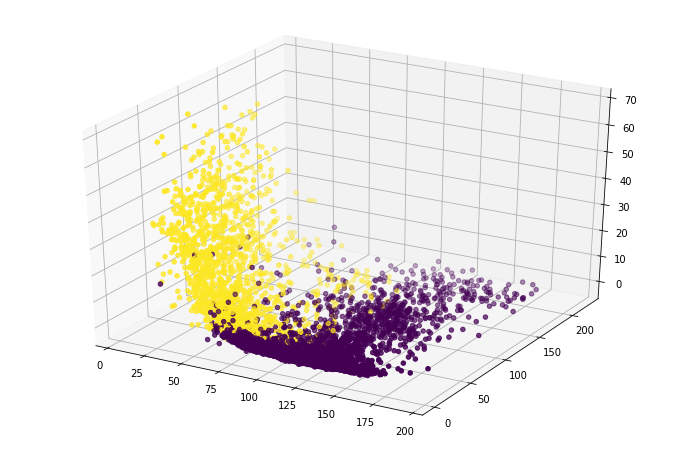

In [15]:
fig = plt.figure(figsize=(12,8))
ax = fig.add_subplot(111,projection='3d')
ax.scatter(stars.mean_IP,stars.mean_c,stars.skew_IP,c=stars.target_class,marker='o')

### Let's see how a simple linear regression model does on classifying the test set.

In [16]:
#We import the proper modules, assign a linear regression object, fit the data, and evaluate the score.:
from sklearn.linear_model import LinearRegression

linfit = LinearRegression().fit(Xtr,ytr)


In [17]:
linfit.score(Xtst,ytst)

0.6795761095553964

Not great.
### How about a Nearest Neighbors model?

In [40]:
from sklearn.neighbors import KNeighborsClassifier

scr_lst=[]
for n in range(3,1000):
    knn=KNeighborsClassifier(n_neighbors=n)
    knn.fit(Xtr,ytr)
    scr_lst.append(knn.score(Xtst,ytst))


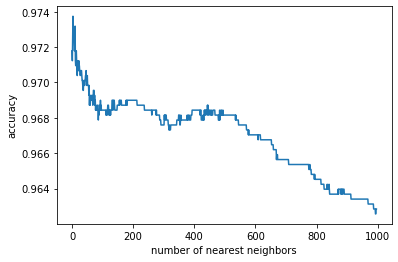

In [41]:
_=plt.plot(scr_lst)
_=plt.ylabel('accuracy')
_=plt.xlabel('number of nearest neighbors')

A maximum accuracy of around 97% isn't bad, but as expected, due to the overlap, increasing the number of neighbors will decrease the accuracy.

In [42]:
scr_lst=[]
for n in range(3,15):
    knn=KNeighborsClassifier(n_neighbors=n)
    knn.fit(Xtr,ytr)
    scr_lst.append(knn.score(Xtst,ytst))

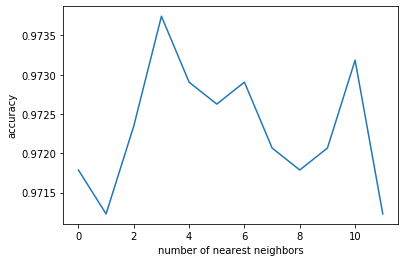

In [43]:
_=plt.plot(scr_lst)
_=plt.ylabel('accuracy')
_=plt.xlabel('number of nearest neighbors')

The maiximum accuracy for the nearest neighbors approach seems to occur when the number of neighbors is 8. Let's choose this and explore the performance of a knn model on the data. It's also important to remember that this accuracy is dependent on this particular version of the train,test split.

In [44]:
knn=KNeighborsClassifier(n_neighbors=3)
knn.fit(Xtr,ytr)
score = round(knn.score(Xtst,ytst),4)*100
print('This iteration scores',score,'%')


This iteration scores 97.18 %


97.5% certainly isn't bad, but considering the billions of trillions of stars that could be surveyed, this leads to a misclassification of an extraordinary number of samples.

## Let's look at how a neural network performs.

In [45]:
from sklearn.neural_network import MLPClassifier

classifier = MLPClassifier(solver='lbfgs',hidden_layer_sizes=(15,15))

In [46]:
classifier.fit(Xtr,ytr)

MLPClassifier(activation='relu', alpha=0.0001, batch_size='auto', beta_1=0.9,
              beta_2=0.999, early_stopping=False, epsilon=1e-08,
              hidden_layer_sizes=(15, 15), learning_rate='constant',
              learning_rate_init=0.001, max_fun=15000, max_iter=200,
              momentum=0.9, n_iter_no_change=10, nesterovs_momentum=True,
              power_t=0.5, random_state=None, shuffle=True, solver='lbfgs',
              tol=0.0001, validation_fraction=0.1, verbose=False,
              warm_start=False)

In [47]:
ypred = classifier.predict(Xtst)

In [48]:
results = ytst==ypred

In [49]:
results

9184      True
4801     False
17051     True
7739      True
15929     True
         ...  
17037     True
17502     True
12180     True
17103     True
10533     True
Name: target_class, Length: 3580, dtype: bool

In [50]:
num_predicted = sum(results)
num_predicted

3324

In [51]:
accuracy = round(num_predicted/len(ytst),4)*100
print('Accuracy:',accuracy,'%')

Accuracy: 92.85 %


In [52]:
accuracy_lst = []
for i in range(3,10):
    for j in range(3,10):
        classifier = MLPClassifier(solver='lbfgs',hidden_layer_sizes=(i,j),learning_rate='adaptive',max_iter=5000)
        classifier.fit(Xtr,ytr)
        ypred = classifier.predict(Xtst)
        results = ytst==ypred
        num_predicted=sum(results)
        accuracy = round(num_predicted/len(ytst),4)*100
        accuracy_lst.append(accuracy)

In [53]:
print(accuracy_lst)


[98.04, 97.49, 8.24, 41.31, 87.96000000000001, 8.72, 90.89, 97.18, 66.79, 95.30999999999999, 92.46, 90.92, 92.71000000000001, 95.73, 92.49000000000001, 22.46, 92.65, 97.32, 97.21, 93.44, 93.46, 98.18, 83.94, 90.89, 6.76, 97.74000000000001, 97.82, 90.89, 97.18, 9.11, 90.89, 91.93, 90.89, 97.96000000000001, 36.01, 98.02, 90.89, 90.89, 95.25, 90.89, 97.99, 89.89, 98.1, 95.03, 91.2, 16.45, 90.89, 92.67999999999999, 90.89]


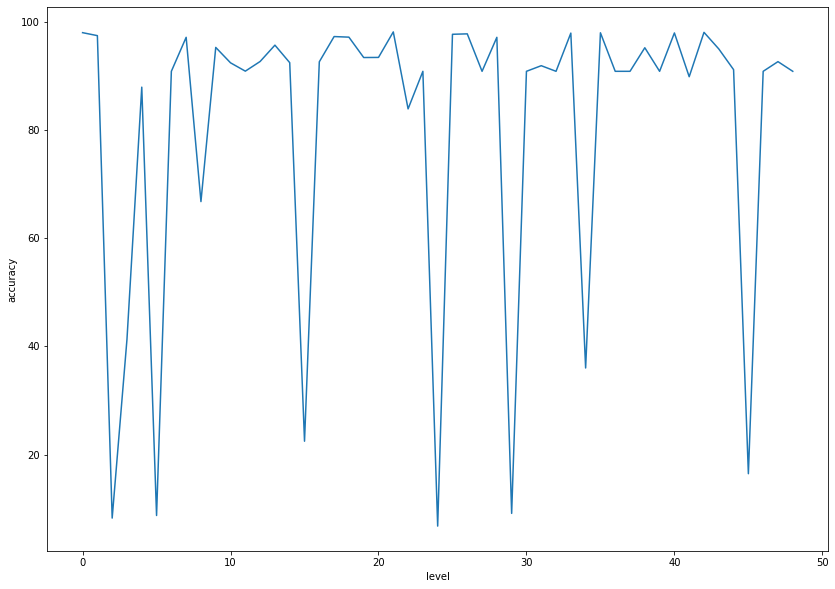

In [54]:
_=plt.figure(figsize=(14,10))
_=plt.plot(accuracy_lst)
_=plt.ylabel('accuracy')
_=plt.xlabel('level')

In [55]:
best = max(accuracy_lst)
print('The perceptron achieves a max accuracy of',best,'%')

The perceptron achieves a max accuracy of 98.18 %
